# Statistical Thinking 

In the next series of challenges, we will predict employee salaries from different employee characteristics (or features). We ask employees working in four different fields to state their salary and some background information.

#### Load Required Libraries

In [58]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


#### 1. How many responders are there? Are there any missing values in any of the variables?

In [37]:
df = pd.read_csv("salary.csv")
x = df.info()
x1 = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


From the above table we can deduce there are 514 entries.

In [36]:
x1

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

From the above table we can deduce the Salary has one missing value.

#### 2. What is the lowest salary and highest salary in the group?

In [39]:
salary = df["salary"]
lowest_salary = min(salary)
highest_salary = max(salary)
print("The lowest salary is {}".format(lowest_salary))
print("The highest salary is {}".format(highest_salary))

The lowest salary is 29000.0
The highest salary is 96156.0


#### 3.What is the mean salary for the sample? Include the standard error of the mean.

In [60]:
mean_salary = np.mean(salary) # mean
std_error_salary = stats.sem(salary, nan_policy="omit") # standard error

mean_salary = round(mean_salary, 2)
std_error_salary = round(std_error_salary, 2)
print("The mean salary is {}".format(mean_salary))
print("The standard error is {}".format(std_error_salary))

The mean salary is 50863.22
The standard error is 560.06


#### 4. What is the standard deviation for the years worked?

In [5]:
yearsworked = df["yearsworked"]
std_yearworked = np.std(yearsworked)

print("The standard deviation is {}".format(std_yearworked))

The standard deviation is 9.435503224576872


#### 5. What is the median salary for the sample?

In [6]:
median_salary = np.nanmedian(salary)
print("The median is: {}".format(median_salary))

The median is: 50096.0


#### 6. What is the interquartile range for salary in the sample?

In [7]:
q1 = np.nanpercentile(salary, 25)
q3 = np.nanpercentile(salary, 75)
IQR = q3 - q1
print(q1)
print(q3)
print("IQR: {}".format(IQR))

40000.0
60345.0
IQR: 20345.0


The 1st quartile is 40 000, the median is 50 096 and the 3rd quartile is 60 345.This means that 25% of salaries are less than 40 000, 25% lie between 40 000 and 50096 & 25% are between 50096 and 60345.



#### 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [50]:
# encode the the variable male appropriately
clean_male = {"male": {0:"No", 1:"Yes"}}
df.replace(clean_male, inplace=True)

male = df["male"]
x = df["male"].value_counts()
print(x)

Yes    386
No     128
Name: male, dtype: int64


There are 386 males and 128 females.

#### 8. How many women are executives compared to men?

In [49]:
# encode the variable position appropriately
clean_position = {"position": {1:"Junior Employee", 2:"Manager", 3:"Executive"}}
df.replace(clean_position, inplace=True)

# create a frequency table
position_gender_table = pd.crosstab(index=df['position'], 
                               columns=df['male'])
# display the frequency table
position_gender_table

male,No,Yes
position,,
Executive,19,192
Junior Employee,60,83
Manager,49,111


There are 19 female executives compared to 192 male executives. In other words female executives make up approximately 10% of male executives.

#### 9. Create a histogram for the variable Salary.

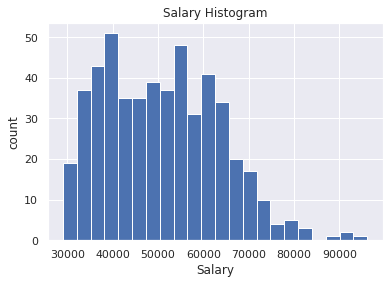

In [57]:
bins = np.sqrt(len(salary)) # "Square Root Rule" - rule of thumb for choosing  number of bins
bins = int(bins) # convert to integer

salary_hist = plt.hist(salary, bins=bins)
salary_hist = plt.xlabel("Salary")
salary_hist = plt.ylabel("count")
salary_hist = plt.title("Salary Histogram")

plt.show()

#### 10. Examine the histogram and describe the distribution for Salary.

The typical salary earned is about 40 000. Salaries between 55 000 and 60 000 are also quite frequent and there is an extremely low number of people who earn salaries in the range of 80 000 and 90 000. Due to the large amount of people who earn low salaries, the histogram is skewed to the left.

#### 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

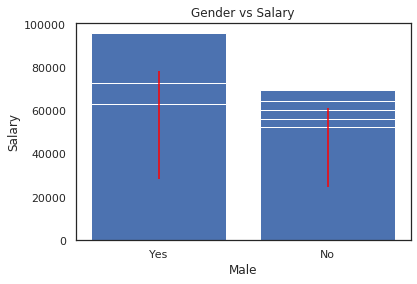

In [70]:

mean = df.groupby('male')['salary'].mean()
std = df.groupby('male')['salary'].std()

# Using 2 * std to estimate the 95 % interval
"""In a normal distribution, the interval [μ - 2σ, μ + 2σ] covers 95.5 %, 
so you can use 2 * std to estimate the 95 % interval:"""
_ = plt.bar(male, salary)
_ = plt.errorbar(mean.index, mean, yerr=2*std, linestyle='', color="red")
_ = plt.xlabel("Male")
_ = plt.ylabel("Salary")
_ = plt.title("Gender vs Salary")

plt.show()


#### 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).

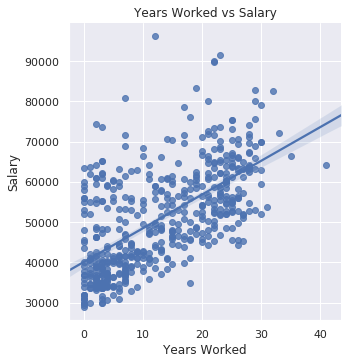

In [51]:
_ = sns.lmplot("yearsworked", "salary", data=df, fit_reg=True)
_ = plt.xlabel("Years Worked")
_ = plt.ylabel("Salary")
_ = plt.title("Years Worked vs Salary")

We have a positive sloping scatter plot, which indicates that as the number of years worked increases, the amount of salary earned tends to increase as well. There are a few outlier datapoints that don't follow the general trend. This could mean that some individuals earn a lot more income even though they have a lot less number of years worked beacause they occupy high-value positions where there is a high demand of scarce skills and qualifications.

#### 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary.